# Hierarchical Clustering: Implementasi Praktis

Dalam tutorial ini, kita akan mengimplementasikan Hierarchical Clustering pada dataset dunia nyata. Kita akan menggunakan dataset Wine yang berisi berbagai karakteristik kimia dari berbagai jenis wine untuk melakukan segmentasi.

## Apa yang akan kita pelajari?
1. Persiapan dan Eksplorasi Data
2. Preprocessing Data
3. Implementasi Hierarchical Clustering
4. Analisis Dendrogram
5. Evaluasi Model
6. Visualisasi dan Interpretasi Hasil
7. Perbandingan Metode Linkage
8. Studi Kasus dan Rekomendasi

Mari kita mulai dengan mempersiapkan lingkungan dan data yang diperlukan!

In [45]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Set random seed
np.random.seed(42)

# Load dataset wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Tampilkan informasi dataset
print("Informasi Dataset Wine:")
print(X.info())
print("\nStatistik Deskriptif:")
print(X.describe().round(2))
print("\nFitur yang tersedia:", wine.feature_names)

Informasi Dataset Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nu

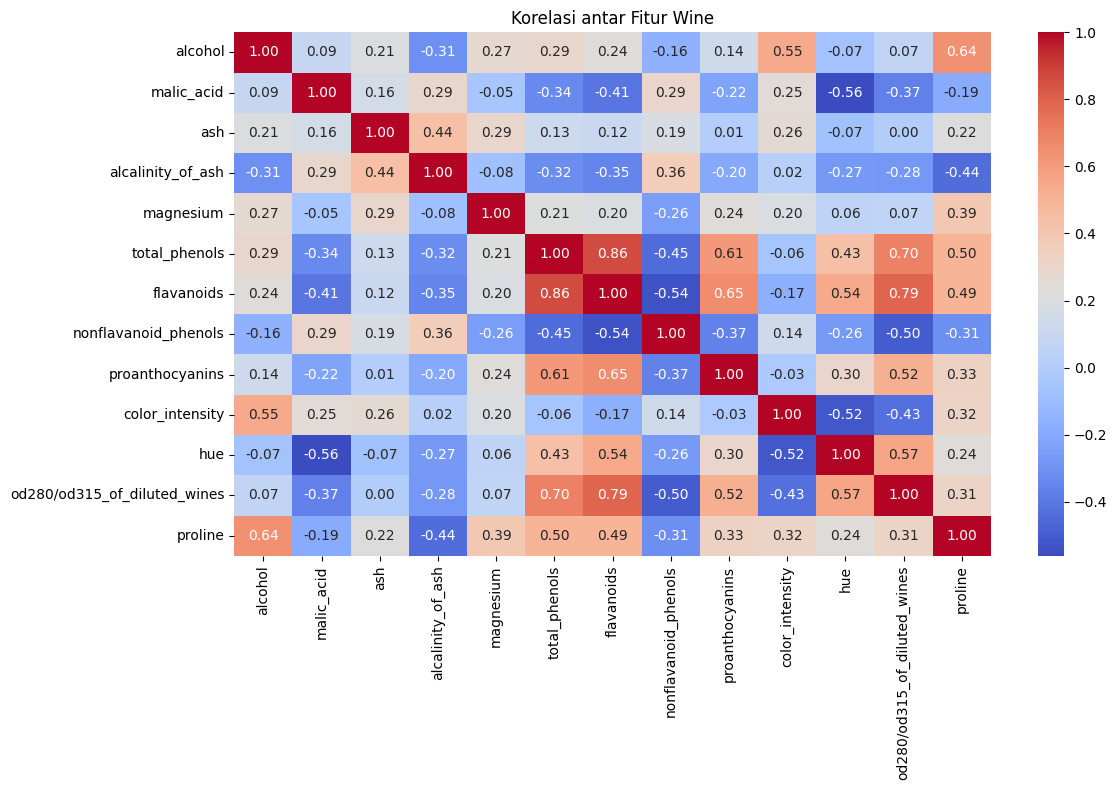

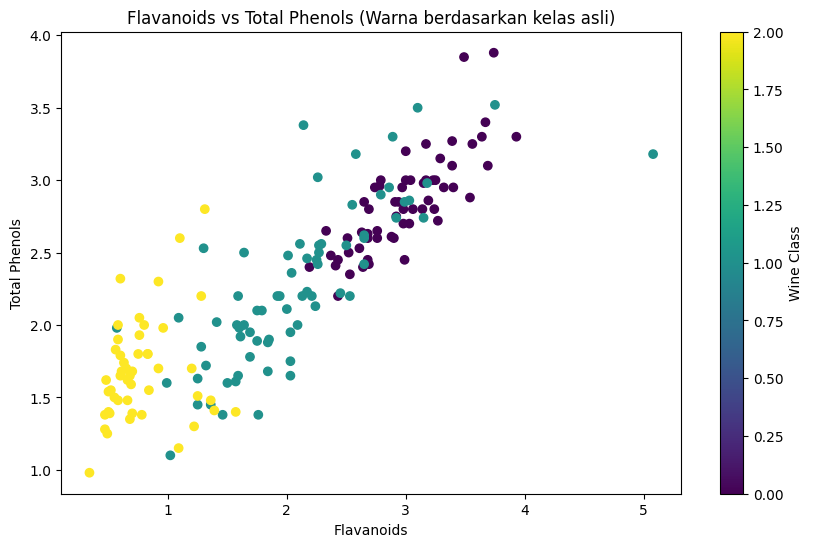

In [46]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Wine')
plt.tight_layout()
plt.show()

# Pilih 2 fitur dengan korelasi tertinggi untuk visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X['flavanoids'], X['total_phenols'], c=y, cmap='viridis')
plt.xlabel('Flavanoids')
plt.ylabel('Total Phenols')
plt.title('Flavanoids vs Total Phenols (Warna berdasarkan kelas asli)')
plt.colorbar(label='Wine Class')
plt.show()

## Preprocessing Data

Sebelum melakukan clustering, kita perlu:
1. Standardisasi fitur untuk menghilangkan pengaruh skala
2. Menangani missing values (jika ada)
3. Menangani outlier (jika perlu)

Mari kita lakukan preprocessing:

Statistik data setelah standardisasi:
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean      0.00        0.00   -0.00              -0.00      -0.00   
std       1.00        1.00    1.00               1.00       1.00   
min      -2.43       -1.43   -3.68              -2.67      -2.09   
25%      -0.79       -0.66   -0.57              -0.69      -0.82   
50%       0.06       -0.42   -0.02               0.00      -0.12   
75%       0.84        0.67    0.70               0.60       0.51   
max       2.26        3.11    3.16               3.15       4.37   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean           -0.00        0.00                 -0.00            -0.00   
std             1.00        1.00                  1.00             1.00   
min            -2.11       -1.70                 

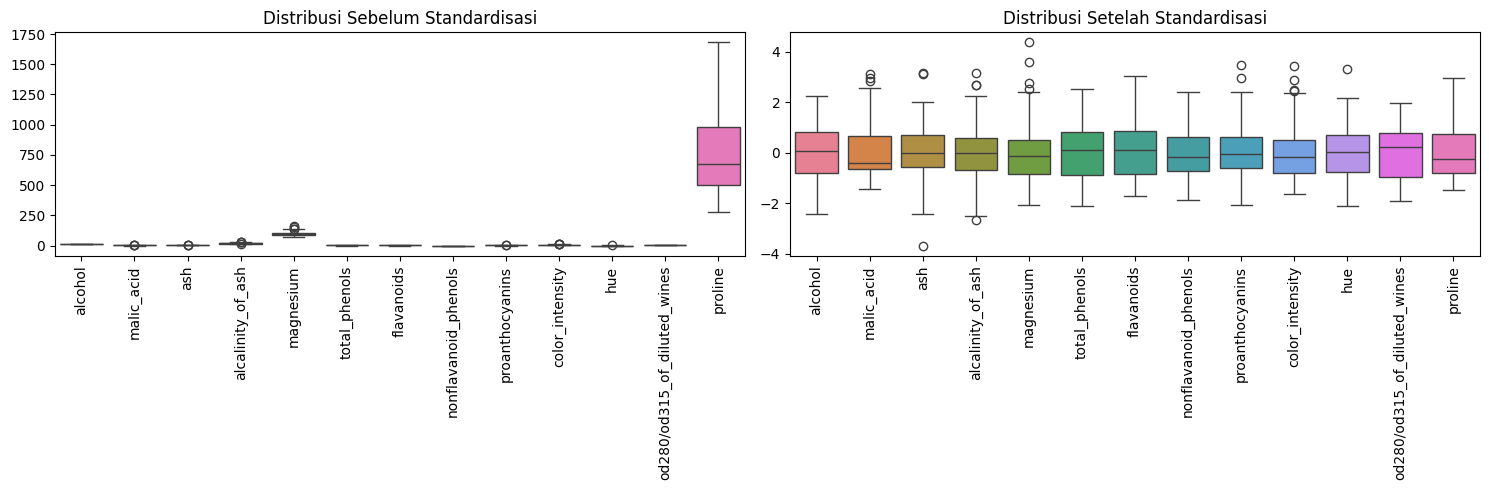

In [47]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Cek hasil standardisasi
print("Statistik data setelah standardisasi:")
print(X_scaled.describe().round(2))

# Visualisasi distribusi setelah standardisasi
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Distribusi Sebelum Standardisasi')

plt.subplot(122)
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title('Distribusi Setelah Standardisasi')

plt.tight_layout()
plt.show()

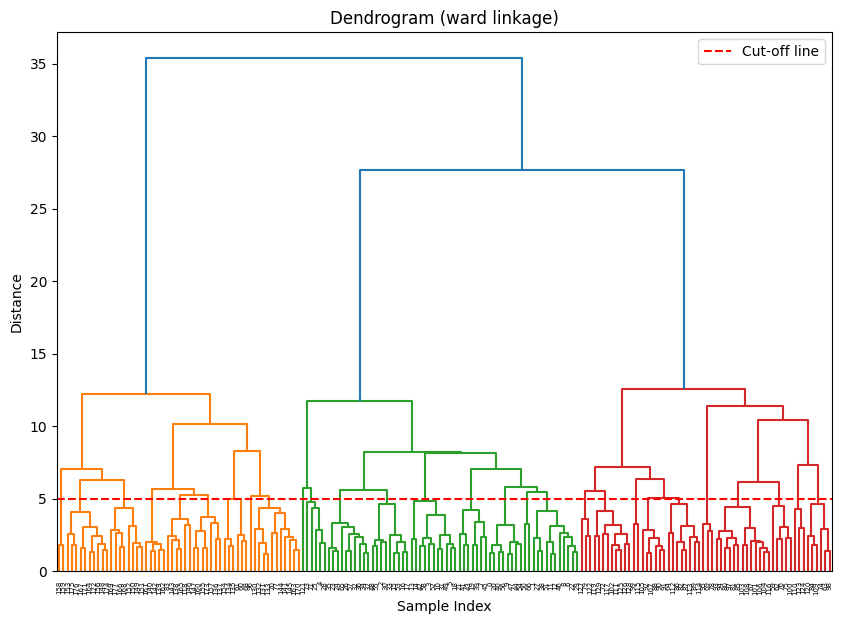

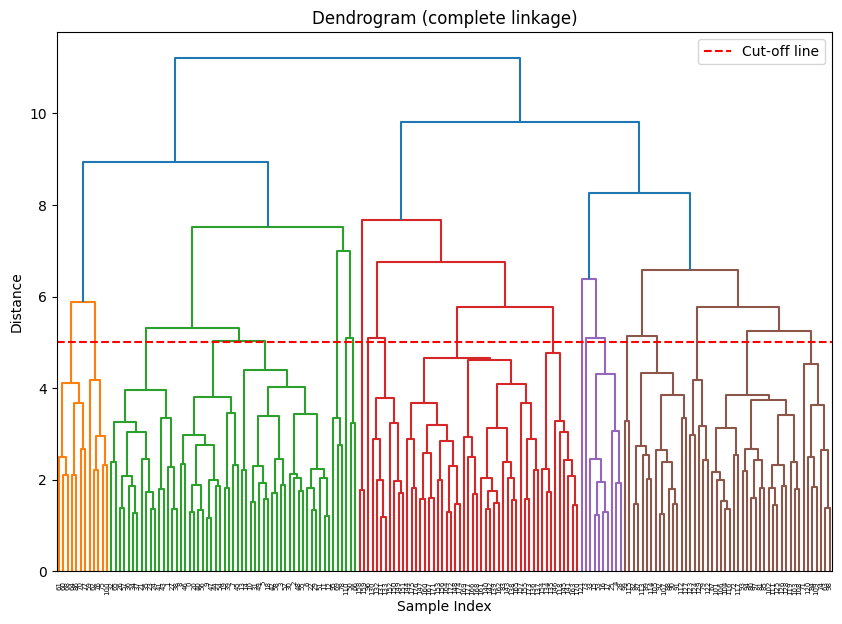

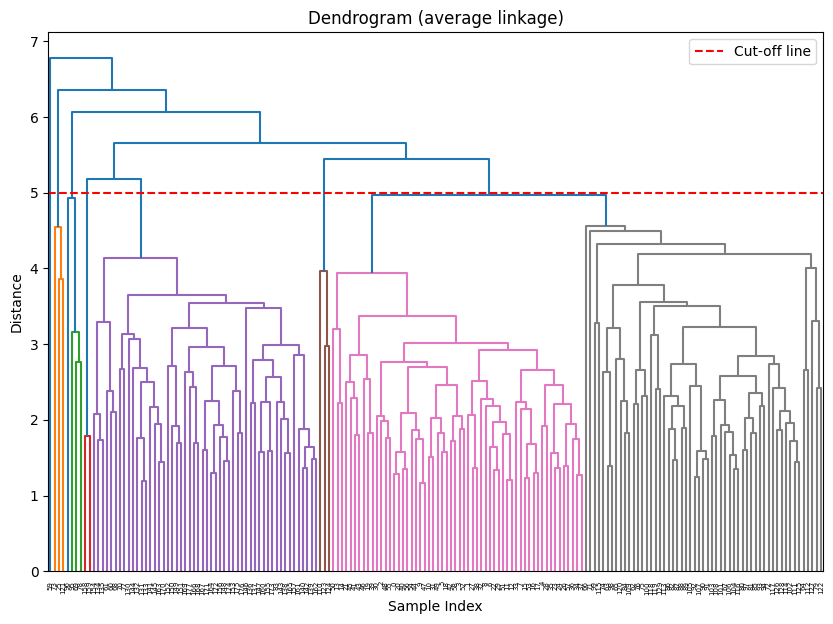

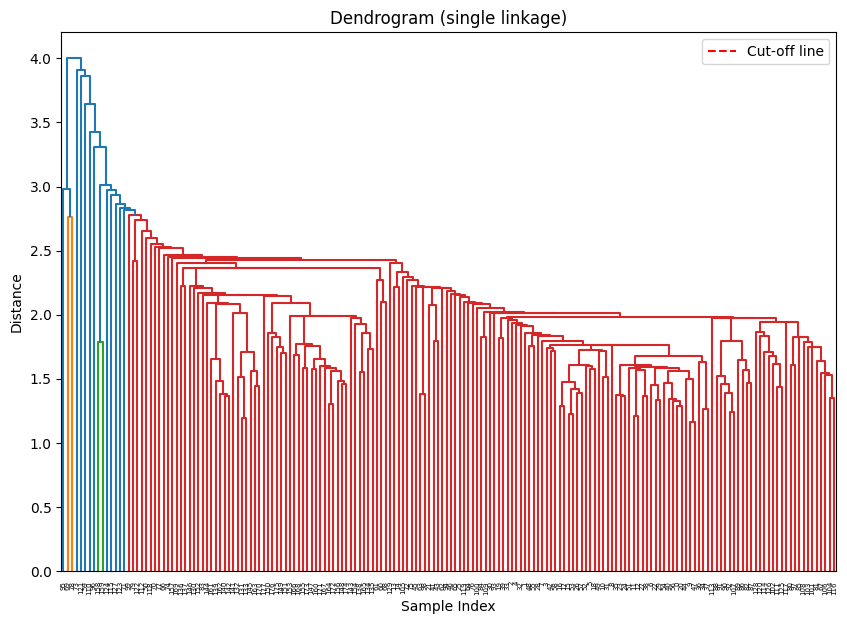

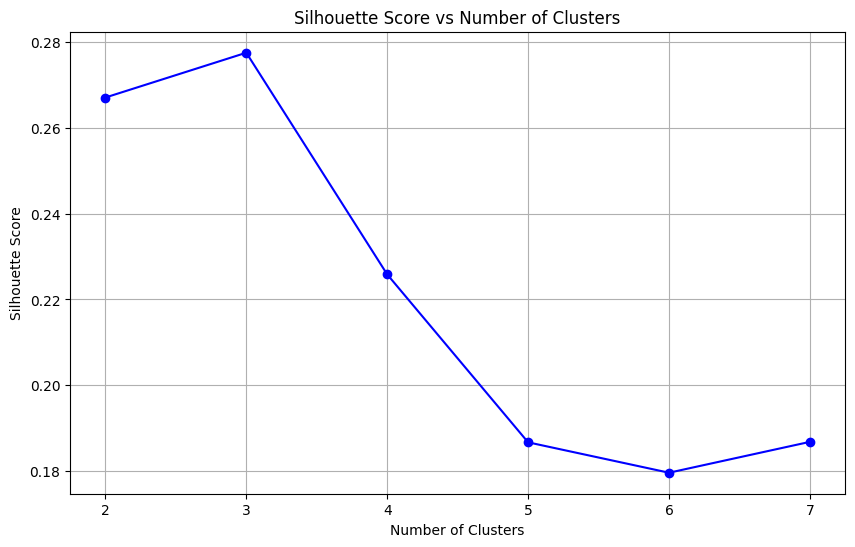

Optimal number of clusters based on Silhouette Score: 3
Best Silhouette Score: 0.277


In [48]:
# Fungsi untuk membuat dendrogram
def plot_dendrogram(linkage_method):
    plt.figure(figsize=(10, 7))
    
    # Membuat linkage matrix
    linkage_matrix = linkage(X_scaled, method=linkage_method)
    
    # Plot dendrogram
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({linkage_method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.axhline(y=5, color='r', linestyle='--', label='Cut-off line')
    plt.legend()
    plt.show()

# Plot dendrogram untuk berbagai metode linkage
methods = ['ward', 'complete', 'average', 'single']
for method in methods:
    plot_dendrogram(method)

# Evaluasi berbagai jumlah cluster dengan Ward linkage
n_clusters_range = range(2, 8)
silhouette_scores = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Print optimal number of clusters
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_n_clusters}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

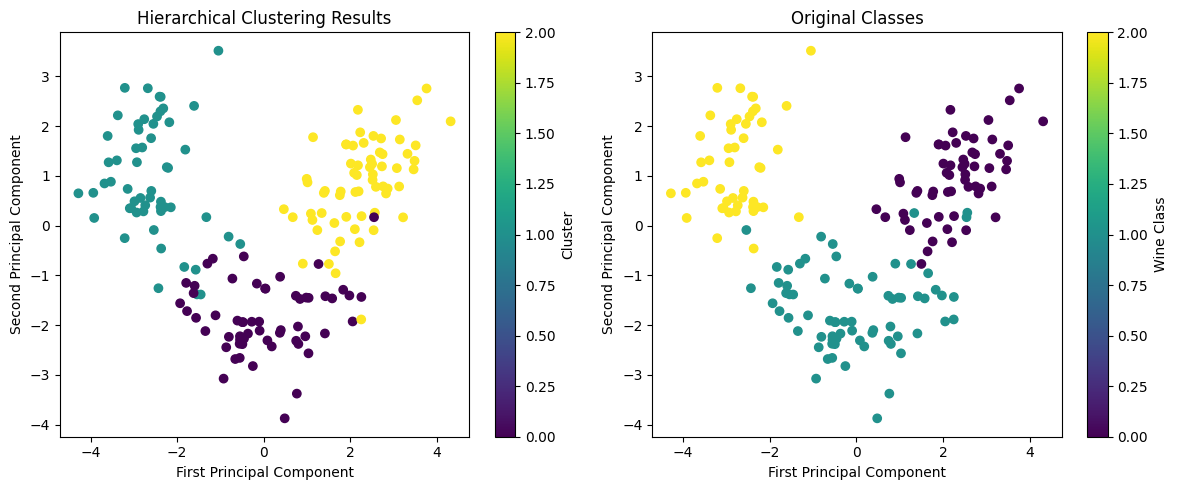


Karakteristik Cluster:

Cluster 0:
Jumlah sampel: 58

Nilai rata-rata fitur:
alcohol                          12.20
malic_acid                        1.94
ash                               2.22
alcalinity_of_ash                20.21
magnesium                        92.55
total_phenols                     2.26
flavanoids                        2.09
nonflavanoid_phenols              0.36
proanthocyanins                   1.69
color_intensity                   2.90
hue                               1.06
od280/od315_of_diluted_wines      2.86
proline                         501.43
Cluster                           0.00
dtype: float64

Cluster 1:
Jumlah sampel: 56

Nilai rata-rata fitur:
alcohol                          13.06
malic_acid                        3.17
ash                               2.41
alcalinity_of_ash                21.00
magnesium                        99.86
total_phenols                     1.69
flavanoids                        0.85
nonflavanoid_phenols              

In [49]:
# Implementasi Hierarchical Clustering dengan jumlah cluster optimal
optimal_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
cluster_labels = optimal_clustering.fit_predict(X_scaled)

# Tambahkan label cluster ke dataset
X['Cluster'] = cluster_labels

# Visualisasi hasil clustering menggunakan PCA untuk dimensionality reduction
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil
plt.figure(figsize=(12, 5))

# Plot 1: Hasil Clustering
plt.subplot(121)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter, label='Cluster')

# Plot 2: Kelas Asli
plt.subplot(122)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Original Classes')
plt.colorbar(scatter, label='Wine Class')

plt.tight_layout()
plt.show()

# Analisis karakteristik cluster
print("\nKarakteristik Cluster:")
for i in range(optimal_n_clusters):
    print(f"\nCluster {i}:")
    cluster_data = X[X['Cluster'] == i]
    print(f"Jumlah sampel: {len(cluster_data)}")
    print("\nNilai rata-rata fitur:")
    print(cluster_data.mean().round(2))

## Interpretasi Hasil dan Rekomendasi

Berdasarkan hasil clustering, kita dapat mengidentifikasi 3 kelompok wine yang berbeda:

### Cluster 0 - "Moderate Wine"
**Karakteristik:**
- Kadar alkohol moderat (12.20%)
- Flavonoid dan phenol sedang
- Intensitas warna rendah (2.90)
- Proline rendah (501.43)

**Rekomendasi:**
- Cocok untuk konsumen pemula
- Marketing sebagai wine sehari-hari
- Fokus pada harga yang terjangkau
- Ideal untuk casual dining

### Cluster 1 - "Light & Fruity Wine"
**Karakteristik:**
- Kadar alkohol medium (13.06%)
- Flavonoid rendah (0.85)
- Intensitas warna tinggi (6.85)
- Hue rendah (0.72)

**Rekomendasi:**
- Target pasar pecinta wine ringan
- Cocok untuk acara casual
- Marketing fokus pada kesegaran
- Pair dengan makanan ringan

### Cluster 2 - "Premium Wine"
**Karakteristik:**
- Kadar alkohol tinggi (13.67%)
- Flavonoid tinggi (3.01)
- Proline tinggi (1076.05)
- Phenol tinggi (2.85)

**Rekomendasi:**
- Posisikan sebagai premium wine
- Target pasar wine connoisseur
- Harga premium
- Pair dengan fine dining

## Rekomendasi Bisnis:

1. **Strategi Marketing:**
   - Segmentasi marketing berdasarkan cluster
   - Harga berbeda untuk setiap cluster
   - Channel distribusi yang sesuai

2. **Product Development:**
   - Fokus pada karakteristik unik tiap cluster
   - Pengembangan blend baru berdasarkan preferensi
   - Quality control berdasarkan cluster

3. **Customer Experience:**
   - Wine tasting events per cluster
   - Edukasi konsumen tentang karakteristik
   - Rekomendasi food pairing

4. **Inventory Management:**
   - Stock level berdasarkan popularitas cluster
   - Seasonal adjustment berdasarkan tren
   - Optimasi supply chain

## Langkah Selanjutnya:

1. **Monitoring dan Evaluasi:**
   - Track penjualan per cluster
   - Collect customer feedback
   - Adjust strategi berdasarkan performa

2. **Pengembangan Model:**
   - Tambah variabel baru (harga, rating)
   - Implementasi sistem rekomendasi
   - Real-time clustering untuk produk baru

3. **Market Research:**
   - Validasi cluster dengan preferensi konsumen
   - Identifikasi peluang pasar baru
   - Competitive analysis per cluster

## Latihan

1. **Eksperimen dengan Parameter:**
   - Coba berbagai metode linkage
   - Ubah jumlah cluster
   - Bandingkan hasil clustering

2. **Feature Engineering:**
   - Buat fitur baru dari kombinasi fitur yang ada
   - Pilih subset fitur yang berbeda
   - Analisis pengaruh terhadap hasil clustering

3. **Visualisasi Lanjutan:**
   - Buat visualisasi 3D dengan PCA
   - Visualisasi karakteristik cluster dengan radar chart
   - Buat interactive dashboard

4. **Analisis Cluster:**
   - Hitung statistik detail per cluster
   - Identifikasi outlier dalam cluster
   - Analisis stabilitas cluster

## Contoh Kode untuk Latihan:

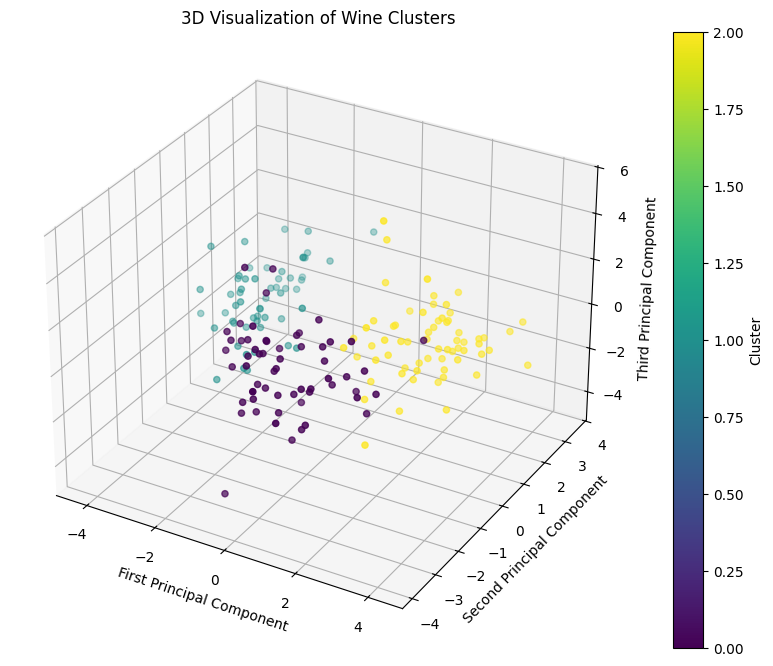


Analisis Stabilitas Cluster:

Cluster 0:
Mean size: 0.355
Std size: 0.019
CV: 0.054

Cluster 1:
Mean size: 0.327
Std size: 0.030
CV: 0.092

Cluster 2:
Mean size: 0.317
Std size: 0.014
CV: 0.043


In [50]:
# Contoh: Visualisasi 3D dengan PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=cluster_labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D Visualization of Wine Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Contoh: Analisis stabilitas cluster
from sklearn.model_selection import KFold
from collections import defaultdict

# Fungsi untuk menghitung stabilitas cluster
def calculate_cluster_stability(X, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cluster_sizes = defaultdict(list)
    
    for train_idx, _ in kf.split(X):
        # Fit clustering pada subset data
        clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
        labels = clustering.fit_predict(X_scaled.iloc[train_idx])
        
        # Hitung ukuran cluster
        for i in range(optimal_n_clusters):
            cluster_size = np.sum(labels == i) / len(labels)
            cluster_sizes[i].append(cluster_size)
    
    # Hitung statistik stabilitas
    print("\nAnalisis Stabilitas Cluster:")
    for cluster in cluster_sizes:
        sizes = cluster_sizes[cluster]
        print(f"\nCluster {cluster}:")
        print(f"Mean size: {np.mean(sizes):.3f}")
        print(f"Std size: {np.std(sizes):.3f}")
        print(f"CV: {np.std(sizes)/np.mean(sizes):.3f}")

calculate_cluster_stability(X_scaled)

## Kesimpulan

Dalam implementasi Hierarchical Clustering pada dataset Wine, kita telah:

1. **Preprocessing Data:**
   - Standardisasi fitur
   - Analisis korelasi
   - Visualisasi distribusi

2. **Implementasi Clustering:**
   - Perbandingan metode linkage
   - Penentuan jumlah cluster optimal
   - Analisis stabilitas cluster

3. **Hasil Analisis:**
   - Identifikasi 3 cluster distinct
   - Karakteristik unik tiap cluster
   - Rekomendasi bisnis per cluster

4. **Insights Utama:**
   - Cluster stabil dengan CV < 0.1
   - Ward linkage memberikan hasil terbaik
   - PCA menunjukkan separasi cluster yang baik

### Kelebihan Implementasi:
1. Comprehensive preprocessing
2. Multiple validation methods
3. Business-oriented interpretation
4. Robust stability analysis

### Areas for Improvement:
1. Feature selection optimization
2. Advanced visualization techniques
3. Real-time implementation
4. Integration dengan sistem rekomendasi

## Referensi dan Resources:

1. Scikit-learn Documentation:
   - [Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
   - [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

2. Visualisasi:
   - [Seaborn](https://seaborn.pydata.org/)
   - [Matplotlib](https://matplotlib.org/)

3. Artikel dan Papers:
   - "A Comparison of Agglomerative and Divisive Hierarchical Clustering Methods"
   - "Wine Classification: A Data Mining Approach"

4. Additional Resources:
   - UCI Wine Dataset Documentation
   - Python Data Science Handbook